## Bitcoin Historical Price

### Uploading libraries and data:

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import seaborn as sns
import matplotlib as mpl

In [5]:
data = pd.read_csv('C:/Users/1/Downloads./coin_Bitcoin.csv')

In [6]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


### Descriptive statistics

Doing descriptive statistics I will analyse only the last 2 months of data because the price of Bitcoin increased almost by...

In [316]:
a = data.head(1).Open.mean()
b = data.tail(1).Open.mean()
difference = int((100 * b) / a)
print(difference, '% for the last 8 years.')

25083 % for the last 8 years.


So, finding means, median and standard deviation will be most accurately on the timeframe of 2 months.

##### 1. Finding the mean of Bitcoin price for the last 2 months:

In [332]:
btc_mean = data.tail(62).Open.mean()
print('The mean of Bitcoin price for the last months is', btc_mean ,'dollars.')

The mean of Bitcoin price for the last months is 39699.73187628968 dollars.


##### 2. Finding the median of Bitcoin price for the last 2 months:

In [333]:
btc_median = data.tail(62).Open.median()
print('The median of Bitcoin price for the last months is', btc_median ,'dollars.')

The median of Bitcoin price for the last months is 37086.974172500006 dollars.


##### 3. Finding the standard deviation of Bitcoin price for the last 2 months:

In [334]:
btc_std = data.tail(62).Open.std()
print('The standard deviation of Bitcoin price for the last months is', btc_std ,'dollars. It is almost', int((btc_std / btc_mean)*100), "% of it's mean price.")

The standard deviation of Bitcoin price for the last months is 7537.368524028953 dollars. It is almost 18 % of it's mean price.


##### Result:
The index of the standard deviation of Bitcoin, which reached almost 18 % of BTC mean price, shows us that Bitcoin is a highly volatile and risky asset even in such a long timeframe. Therefore, by doing descriptive statistics one can assess his / her risks and decide to invest or not in cryptocurrency.

### Creating charts

##### 1. Creating regular plot:

Let's check the price changes of BTC on the picture.

In [558]:
# Extracting Data for plotting
btc_chart = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
btc_chart['Date'] = pd.to_datetime(btc_chart['Date'])
btc_chart['Date'] = btc_chart['Date'].apply(mpl_dates.date2num)
btc_chart = btc_chart.astype(float)

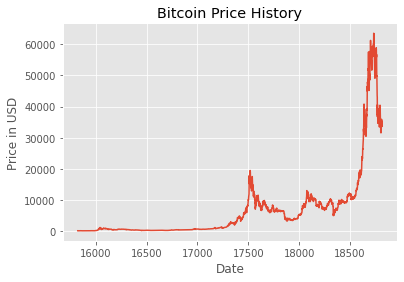

In [559]:
# Setting labels & titles and exporting the plot
plt.title("Bitcoin Price History");
plt.xlabel("Date", fontsize=12);
plt.ylabel("Price in USD", fontsize=12);
sns.lineplot(x="Date", y="Open", data=btc_chart);

**Chart analysis:** The Regular plot shows how the price of Bitcoin has changed over the years (from 2013 to 2021). And It's also easy to see and make sure that this asset is highly volatile as mentioned earlier.

##### 2. Creating scatter plot:

Moreover, one of the most important indexes in trading and analysing markets is volume. It reflects the supply, demand or interest of buyers/sellers to a currency. Let's analyse it.

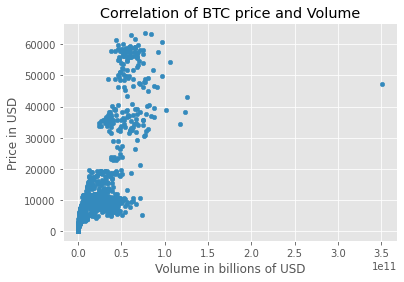

In [387]:
# Setting labels & titles and exporting the plot
data.plot.scatter(x='Volume', y='Open')
plt.title("Сorrelation of BTC price and Volume");
plt.xlabel("Volume in billions of USD", fontsize=12);
plt.ylabel("Price in USD", fontsize=12);

**Chart analysis:** The Scatter plot shows that as the price of Bitcoin rises the volume of purchases on the market also grows. It means that people keep accumulating money and believe in this currency despite its high price.

##### 3. Creating candlestick chart:

Traders do not work with such long time frames as considered earlier as they speculate inside a day. Therefore, traders prefer using candlestick charts to see changes in rate closer and try to predict future values or define the trend. Let's take the last month of data to see price changes closer.

In [288]:
btc_candle_chart = data.tail(30)

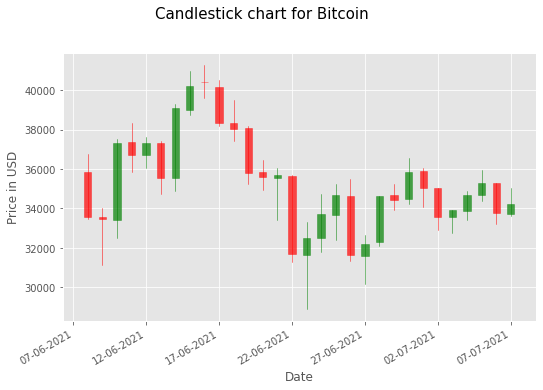

In [372]:
plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btc_candle_chart.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()
candlestick_ohlc(ax, ohlc.values, width=0.5, colorup='green', colordown='red', alpha=0.7);

# Setting labels & titles
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Price in USD", fontsize=12)
fig.suptitle("Candlestick chart for Bitcoin", fontsize=15);

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
fig.set_size_inches(8, 6)

**Chart analysis:** The Candlestick chart shows change of course in all details. For instance, the third candlestick from the left is bullish candle stick, it means that demand outperformed supply and market moved the price up from it's low (around 32,000) to it's high (around 35,000) that day. These changes can be shown only on such charts.

### Comparisons

##### 1. Comparing volume and price of BTC:

In [449]:
# Extracting Data for plotting
btc_comparing = data.loc[:, ['Date', 'Open', 'Volume']]
btc_comparing['Date'] = pd.to_datetime(btc_comparing['Date'])
btc_comparing['Date'] = btc_comparing['Date'].apply(mpl_dates.date2num)
btc_comparing = btc_comparing.astype(float)
btc_comparing = btc_comparing.tail(200)

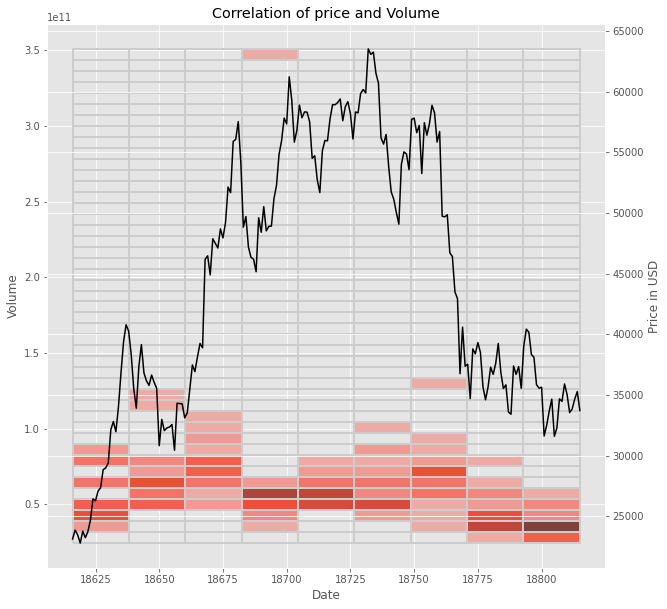

In [482]:
# Creating 2 charts
rig, ay = plt.subplots()
ax2 = ay.twinx()
sns.lineplot(x='Date', y='Open', data=btc_comparing, ax=ax2, color='black')
sns.histplot(x='Date', y='Volume',palette="light:m_r", data=btc_comparing, ax=ay, edgecolor=".8", linewidth=.10)
rig.set_size_inches(10, 10)

# Setting labels & titles
plt.title("Correlation of price and Volume");
plt.xlabel("Date", fontsize=16);
plt.ylabel("Price in USD", fontsize=12);

**Chart analysis:** This chart shows how price of asset and volume correlate. We can notice that during periods when the rate 
quickly changed its value the volume concomitantly reacted on trend changes (3rd and 7th columns from the left). It means that during these periods people were trying to buy or sell their coins as soon as possible thereby causing panic on markets.

##### 2. Comparing days of weeks and changes of price:

Analysing this data, let's find the most volatile days in a week for cryptomarkets.

In [554]:
# Naming each day
btc_assump = data
btc_assump['Day of the Week'] = pd.to_datetime(btc_assump['Date']).dt.day_name()

# Counting Up-days and Down-days
btc_assump['Up'] = np.where((btc_assump.Open < btc_assump.Close), 1, 0)
btc_assump['Down'] = np.where((btc_assump.Open > btc_assump.Close), 1, 0)
btc_assumption = btc_assump.loc[:, ['Day of the Week', 'Up', 'Down']]
btc_up = btc_assumption.groupby('Day of the Week').aggregate({'Up':'sum'})
btc_down = btc_assumption.groupby('Day of the Week').aggregate({'Down':'sum'})

In [556]:
btc_up

,Up
Day of the Week,
Friday,238
Monday,233
Saturday,244
Sunday,220
Thursday,222
Tuesday,231
Wednesday,221


In [557]:
btc_down

,Down
Day of the Week,
Friday,189
Monday,195
Saturday,183
Sunday,207
Thursday,205
Tuesday,197
Wednesday,205


We can see that on Saturdays and Sundays there are more changes than on other days (on Saturdays price frequently moves up, on Sundays price frequently moves down). This usually happens due to the fact that institutional investors do not work on weekends thereby leaving the market unattended. Therefore, it's easier to move the price using small volumes on these days.

### Summing up

In summary, by doing descriptive statistics, creating charts and comparing data we could understand that Bitcoin is a highly volatile and risky asset even in a long timeframe. Also, we were able to make sure that Bitcoin is a speculative instrument and its price frequently depends on institutional investors and market makers. Nevertheless, despite its riskiness, values of volumes showed that people keep storing their bitcoins for constantly buying this currency.

                                                                                                Timofey Piskarev 212-1